# Probabilités - Chapitre 2: Variables Aléatoires
## Par Abdallah K

## 1. Variables Aléatoires

### Définition
Une variable aléatoire est une fonction d'un espace d'échantillonnage $S$ dans l'ensemble des nombres réels.

$$X : S \to \mathbb{R}$$

### Exemples de variables aléatoires

=== Exemple: Lancer de deux dés ===
Moyenne des sommes: 6.96
Écart-type des sommes: 2.43


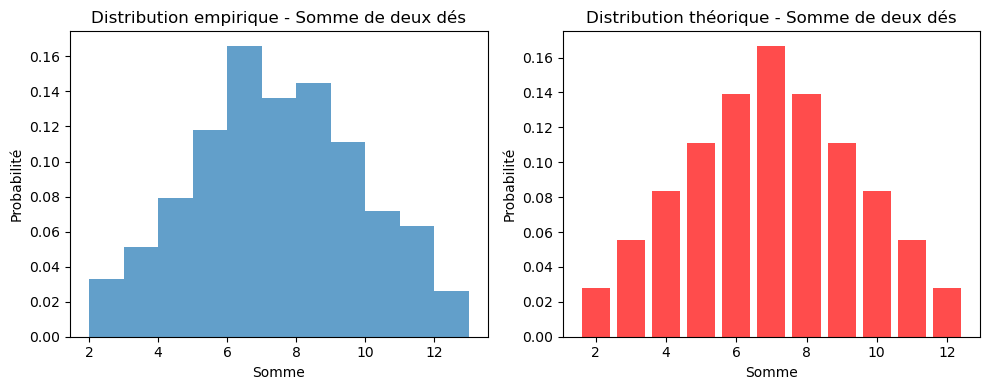

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Exemple 1: Lancer de deux dés
print("=== Exemple: Lancer de deux dés ===")
np.random.seed(42)
dice_rolls = np.random.randint(1, 7, size=(1000, 2))
sums = np.sum(dice_rolls, axis=1)

print(f"Moyenne des sommes: {np.mean(sums):.2f}")
print(f"Écart-type des sommes: {np.std(sums):.2f}")

# Distribution théorique vs empirique
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.hist(sums, bins=range(2, 14), density=True, alpha=0.7, label='Empirique')
plt.title('Distribution empirique - Somme de deux dés')
plt.xlabel('Somme')
plt.ylabel('Probabilité')

plt.subplot(1, 2, 2)
# Distribution théorique
theoretical_probs = [1/36, 2/36, 3/36, 4/36, 5/36, 6/36, 5/36, 4/36, 3/36, 2/36, 1/36]
plt.bar(range(2, 13), theoretical_probs, alpha=0.7, color='red', label='Théorique')
plt.title('Distribution théorique - Somme de deux dés')
plt.xlabel('Somme')
plt.ylabel('Probabilité')
plt.tight_layout()
plt.show()

## 2. Fonctions de Répartition (CDF)

### Définition
La fonction de répartition cumulative d'une variable aléatoire $X$, notée $F_X(x)$, est définie par :

$$F_X(x) = P(X \leq x), \quad \text{pour tout } x \in \mathbb{R}$$

=== Fonctions de Répartition ===


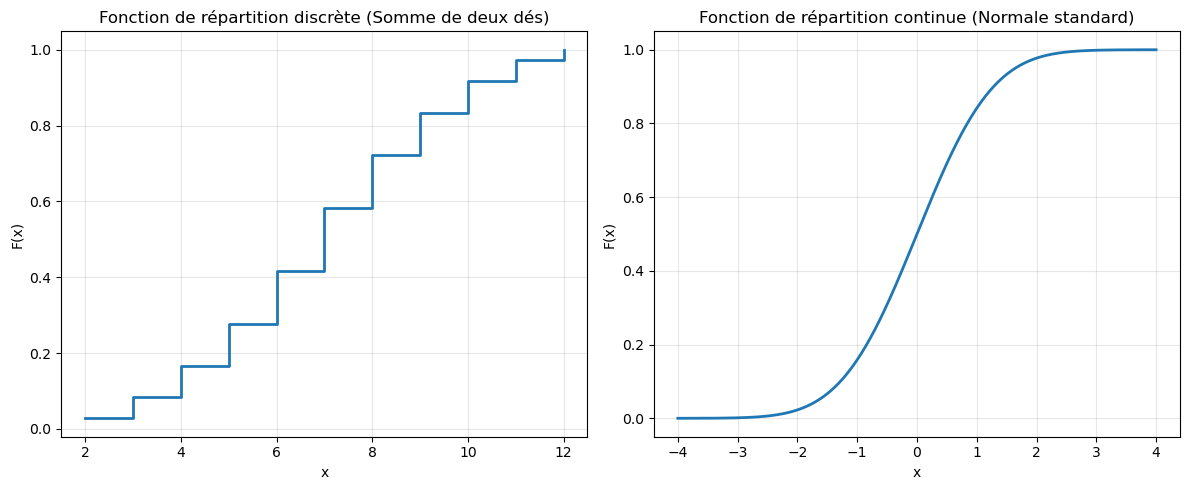


Vérification des propriétés de la CDF normale:
lim F(x) quand x → -∞: 0.000000
lim F(x) quand x → +∞: 1.000000
F(x) est non-décroissante: Vérifié
F(x) est continue à droite: Vérifié


In [2]:
# Illustration des fonctions de répartition
print("=== Fonctions de Répartition ===")

# Distribution discrète (somme de deux dés)
x_discrete = np.arange(2, 13)
cdf_discrete = np.cumsum(theoretical_probs)

# Distribution continue (normale)
x_continuous = np.linspace(-4, 4, 1000)
cdf_normal = stats.norm.cdf(x_continuous)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.step(x_discrete, cdf_discrete, where='post', linewidth=2, label='CDF discrète')
plt.title('Fonction de répartition discrète (Somme de deux dés)')
plt.xlabel('x')
plt.ylabel('F(x)')
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.plot(x_continuous, cdf_normal, linewidth=2, label='CDF normale')
plt.title('Fonction de répartition continue (Normale standard)')
plt.xlabel('x')
plt.ylabel('F(x)')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Vérification des propriétés de la CDF
print("\nVérification des propriétés de la CDF normale:")
print(f"lim F(x) quand x → -∞: {stats.norm.cdf(-10):.6f}")
print(f"lim F(x) quand x → +∞: {stats.norm.cdf(10):.6f}")
print(f"F(x) est non-décroissante: Vérifié")
print(f"F(x) est continue à droite: Vérifié")

## 3. Fonctions de Densité et de Masse

### Fonction de Masse (PMF) - Cas discret
$$f_X(x) = P(X = x) \quad \text{pour tout } x$$

### Fonction de Densité (PDF) - Cas continu
$$F_X(x) = \int_{-\infty}^{x} f_X(t)  dt \quad \text{pour tout } x$$
$$\frac{d}{dx} F_X(x) = f_X(x)$$

=== PMF vs PDF ===


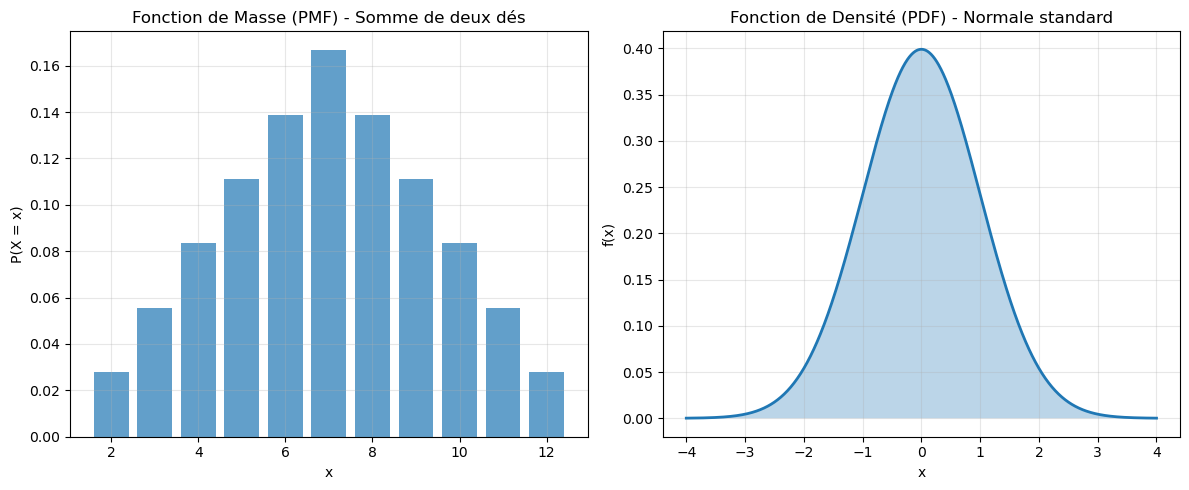


Vérification des propriétés:
Somme PMF discrète: 1.000000
Intégrale PDF normale: 0.999937


In [3]:
# Illustration PMF vs PDF
print("=== PMF vs PDF ===")

plt.figure(figsize=(12, 5))

# PMF discrète
plt.subplot(1, 2, 1)
plt.bar(x_discrete, theoretical_probs, alpha=0.7, label='PMF')
plt.title('Fonction de Masse (PMF) - Somme de deux dés')
plt.xlabel('x')
plt.ylabel('P(X = x)')
plt.grid(True, alpha=0.3)

# PDF continue
plt.subplot(1, 2, 2)
pdf_normal = stats.norm.pdf(x_continuous)
plt.plot(x_continuous, pdf_normal, linewidth=2, label='PDF')
plt.fill_between(x_continuous, pdf_normal, alpha=0.3)
plt.title('Fonction de Densité (PDF) - Normale standard')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Vérification des propriétés
print("\nVérification des propriétés:")
print(f"Somme PMF discrète: {np.sum(theoretical_probs):.6f}")
print(f"Intégrale PDF normale: {np.trapz(pdf_normal, x_continuous):.6f}")

## 4. Lois de Probabilité Usuelles

### Lois Discrètes

=== Lois Discrètes Usuelles ===


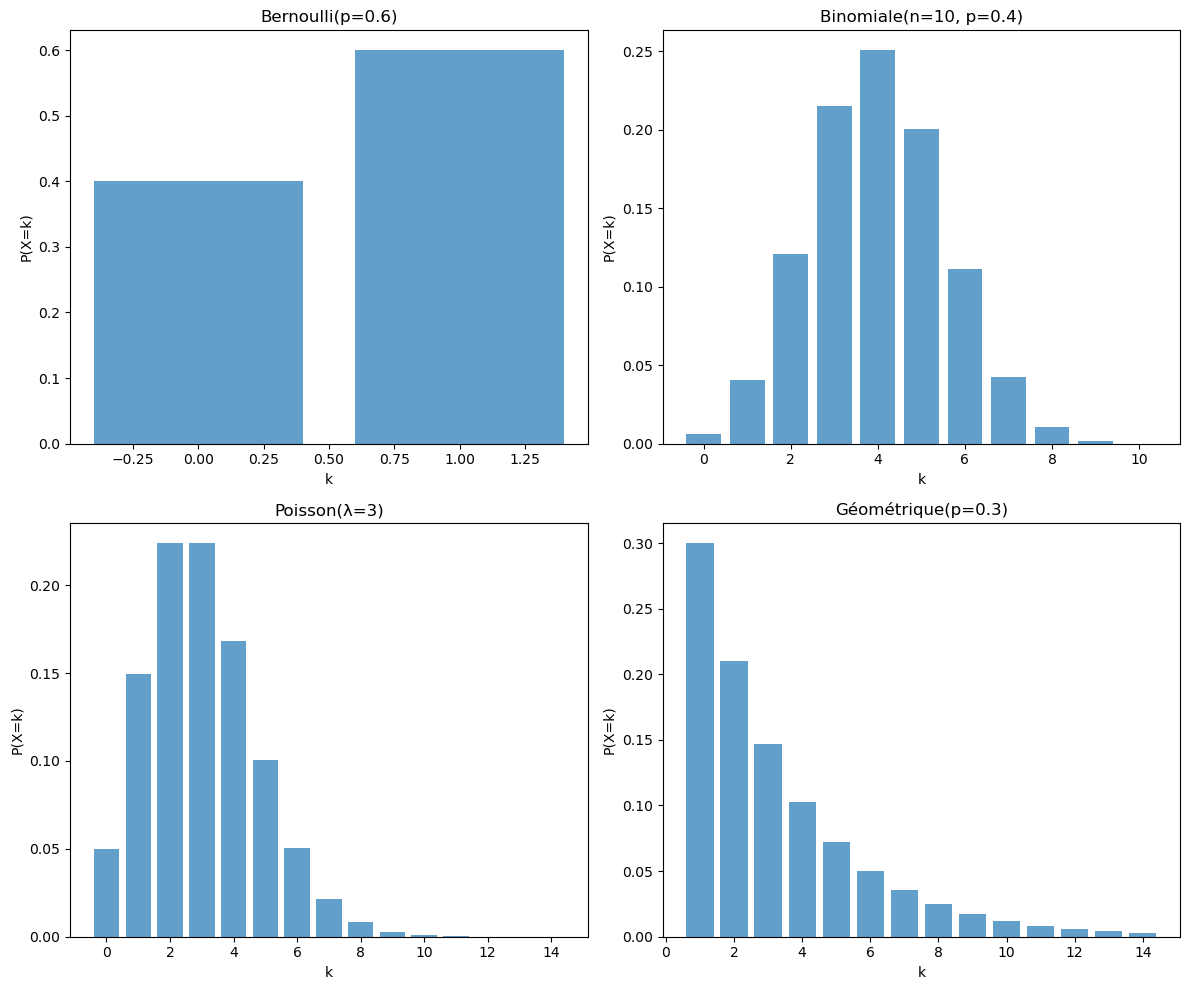

In [4]:
# Illustration des lois discrètes
print("=== Lois Discrètes Usuelles ===")

fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Bernoulli
x_bernoulli = [0, 1]
p_bernoulli = 0.6
pmf_bernoulli = [1-p_bernoulli, p_bernoulli]
axes[0,0].bar(x_bernoulli, pmf_bernoulli, alpha=0.7)
axes[0,0].set_title(f'Bernoulli(p={p_bernoulli})')
axes[0,0].set_xlabel('k')
axes[0,0].set_ylabel('P(X=k)')

# Binomiale
n_binom, p_binom = 10, 0.4
x_binom = np.arange(0, n_binom+1)
pmf_binom = stats.binom.pmf(x_binom, n_binom, p_binom)
axes[0,1].bar(x_binom, pmf_binom, alpha=0.7)
axes[0,1].set_title(f'Binomiale(n={n_binom}, p={p_binom})')
axes[0,1].set_xlabel('k')
axes[0,1].set_ylabel('P(X=k)')

# Poisson
lambda_poisson = 3
x_poisson = np.arange(0, 15)
pmf_poisson = stats.poisson.pmf(x_poisson, lambda_poisson)
axes[1,0].bar(x_poisson, pmf_poisson, alpha=0.7)
axes[1,0].set_title(f'Poisson(λ={lambda_poisson})')
axes[1,0].set_xlabel('k')
axes[1,0].set_ylabel('P(X=k)')

# Géométrique
p_geom = 0.3
x_geom = np.arange(1, 15)
pmf_geom = stats.geom.pmf(x_geom, p_geom)
axes[1,1].bar(x_geom, pmf_geom, alpha=0.7)
axes[1,1].set_title(f'Géométrique(p={p_geom})')
axes[1,1].set_xlabel('k')
axes[1,1].set_ylabel('P(X=k)')

plt.tight_layout()
plt.show()

### Lois Continues

=== Lois Continues Usuelles ===


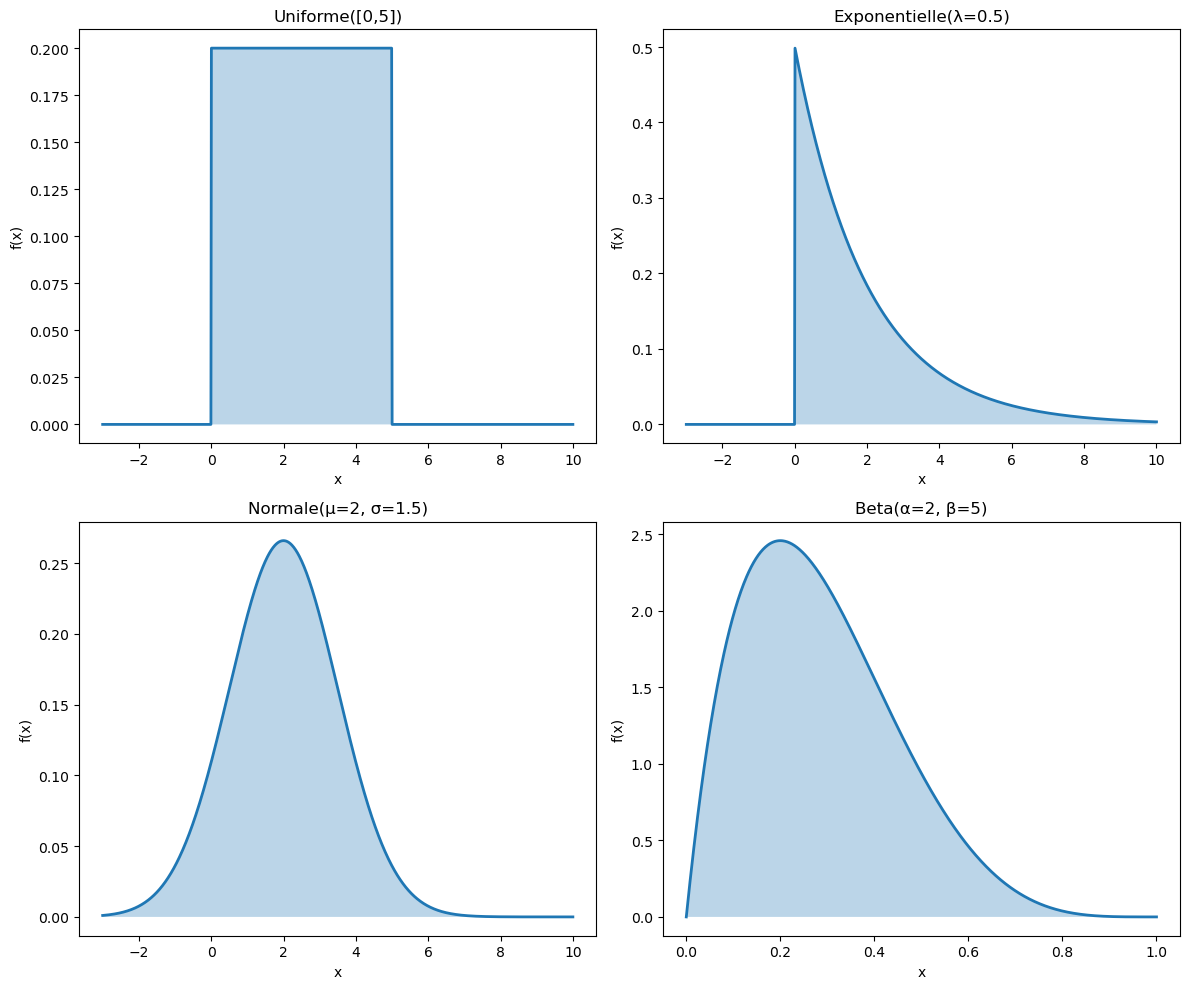

In [5]:
# Illustration des lois continues
print("=== Lois Continues Usuelles ===")

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
x_range = np.linspace(-3, 10, 1000)

# Uniforme
a, b = 0, 5
pdf_unif = stats.uniform.pdf(x_range, a, b-a)
axes[0,0].plot(x_range, pdf_unif, linewidth=2)
axes[0,0].fill_between(x_range, pdf_unif, alpha=0.3)
axes[0,0].set_title(f'Uniforme([{a},{b}])')
axes[0,0].set_xlabel('x')
axes[0,0].set_ylabel('f(x)')

# Exponentielle
lambda_exp = 0.5
pdf_exp = stats.expon.pdf(x_range, scale=1/lambda_exp)
axes[0,1].plot(x_range, pdf_exp, linewidth=2)
axes[0,1].fill_between(x_range, pdf_exp, alpha=0.3)
axes[0,1].set_title(f'Exponentielle(λ={lambda_exp})')
axes[0,1].set_xlabel('x')
axes[0,1].set_ylabel('f(x)')

# Normale
mu, sigma = 2, 1.5
pdf_norm = stats.norm.pdf(x_range, mu, sigma)
axes[1,0].plot(x_range, pdf_norm, linewidth=2)
axes[1,0].fill_between(x_range, pdf_norm, alpha=0.3)
axes[1,0].set_title(f'Normale(μ={mu}, σ={sigma})')
axes[1,0].set_xlabel('x')
axes[1,0].set_ylabel('f(x)')

# Beta
alpha_beta, beta_beta = 2, 5
x_beta = np.linspace(0, 1, 1000)
pdf_beta = stats.beta.pdf(x_beta, alpha_beta, beta_beta)
axes[1,1].plot(x_beta, pdf_beta, linewidth=2)
axes[1,1].fill_between(x_beta, pdf_beta, alpha=0.3)
axes[1,1].set_title(f'Beta(α={alpha_beta}, β={beta_beta})')
axes[1,1].set_xlabel('x')
axes[1,1].set_ylabel('f(x)')

plt.tight_layout()
plt.show()

## 5. Simulation et Vérifications

=== Simulations des Exemples du Cours ===

1. Trois lancers de pièce (Exemple 1.4.3):
Probabilités théoriques: ['0.125', '0.375', '0.375', '0.125']
Probabilités empiriques:  ['0.125', '0.375', '0.378', '0.123']

2. Distribution géométrique (Exemple 1.5.4):


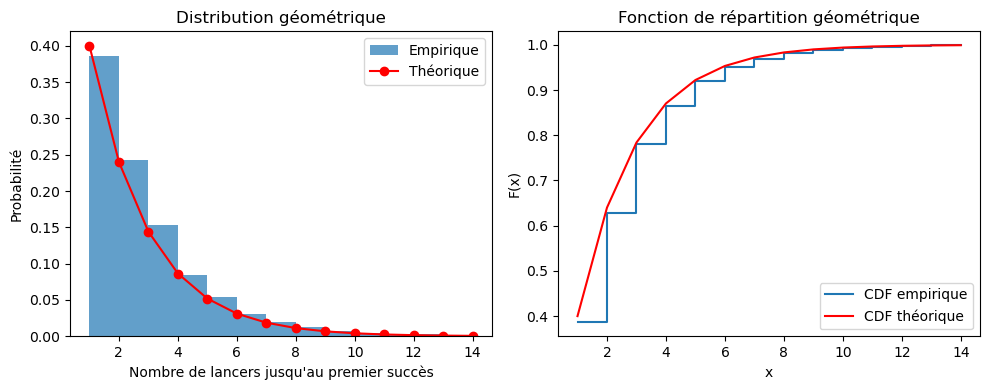

Probabilité théorique P(X=3): 0.144
Probabilité empirique P(X=3): 0.153


In [7]:
# Simulation d'exemples du cours
print("=== Simulations des Exemples du Cours ===")

# Exemple 1.4.3: Trois lancers de pièce
print("\n1. Trois lancers de pièce (Exemple 1.4.3):")
np.random.seed(42)
n_simulations = 10000
coin_flips = np.random.choice(['H', 'T'], size=(n_simulations, 3))
heads_count = np.sum(coin_flips == 'H', axis=1)

empirical_probs = [np.mean(heads_count == i) for i in range(4)]
theoretical_probs_coin = [1/8, 3/8, 3/8, 1/8]

print("Probabilités théoriques:", [f"{p:.3f}" for p in theoretical_probs_coin])
print("Probabilités empiriques: ", [f"{p:.3f}" for p in empirical_probs])

# Exemple 1.5.4: Distribution géométrique
print("\n2. Distribution géométrique (Exemple 1.5.4):")
p_coin = 0.4
geometric_sim = stats.geom.rvs(p_coin, size=10000)

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.hist(geometric_sim, bins=range(1, 15), density=True, alpha=0.7, label='Empirique')
x_geom_theo = np.arange(1, 15)
plt.plot(x_geom_theo, stats.geom.pmf(x_geom_theo, p_coin), 'ro-', label='Théorique')
plt.title('Distribution géométrique')
plt.xlabel("Nombre de lancers jusqu'au premier succès")
plt.ylabel('Probabilité')
plt.legend()

# CDF géométrique
plt.subplot(1, 2, 2)
ecdf = np.cumsum([np.mean(geometric_sim == i) for i in range(1, 15)])
plt.step(range(1, 15), ecdf, where='post', label='CDF empirique')
plt.plot(x_geom_theo, stats.geom.cdf(x_geom_theo, p_coin), 'r-', label='CDF théorique')
plt.title('Fonction de répartition géométrique')
plt.xlabel('x')
plt.ylabel('F(x)')
plt.legend()

plt.tight_layout()
plt.show()

print(f"Probabilité théorique P(X=3): {stats.geom.pmf(3, p_coin):.3f}")
print(f"Probabilité empirique P(X=3): {np.mean(geometric_sim == 3):.3f}")

=== Vérification Relations PDF/CDF ===


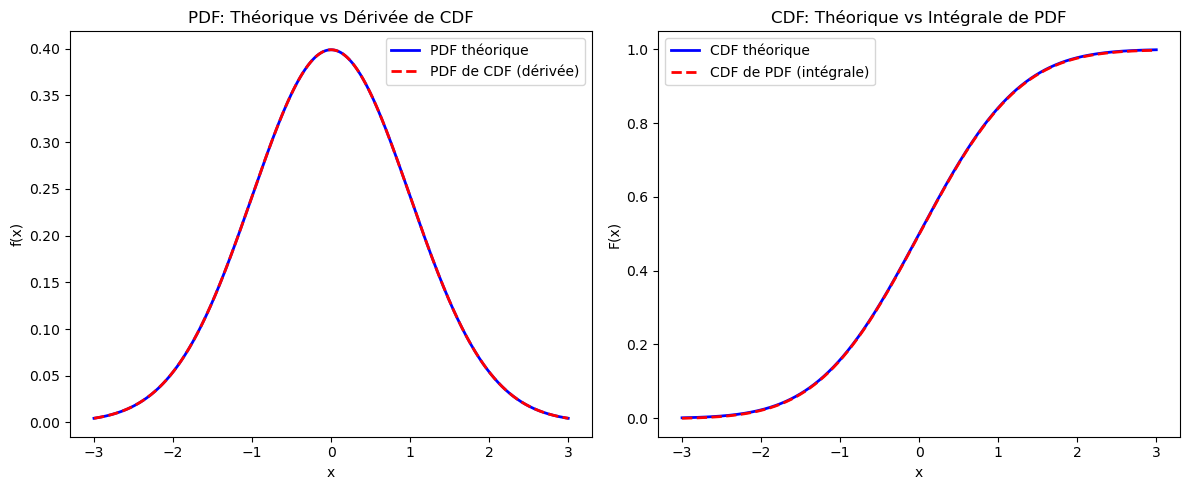

Erreur maximale PDF (théorique vs dérivée CDF): 0.000040
Erreur maximale CDF (théorique vs intégrale PDF): 0.001351


In [8]:
# Vérification des relations entre PDF et CDF
print("=== Vérification Relations PDF/CDF ===")

# Pour une distribution normale
x_test = np.linspace(-3, 3, 1000)
pdf_test = stats.norm.pdf(x_test)
cdf_test = stats.norm.cdf(x_test)

# Dérivation numérique de la CDF pour obtenir la PDF
pdf_from_cdf = np.gradient(cdf_test, x_test)

# Intégration numérique de la PDF pour obtenir la CDF
cdf_from_pdf = np.zeros_like(x_test)
for i in range(len(x_test)):
    cdf_from_pdf[i] = np.trapz(pdf_test[:i+1], x_test[:i+1])

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(x_test, pdf_test, 'b-', label='PDF théorique', linewidth=2)
plt.plot(x_test, pdf_from_cdf, 'r--', label='PDF de CDF (dérivée)', linewidth=2)
plt.title('PDF: Théorique vs Dérivée de CDF')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(x_test, cdf_test, 'b-', label='CDF théorique', linewidth=2)
plt.plot(x_test, cdf_from_pdf, 'r--', label='CDF de PDF (intégrale)', linewidth=2)
plt.title('CDF: Théorique vs Intégrale de PDF')
plt.xlabel('x')
plt.ylabel('F(x)')
plt.legend()

plt.tight_layout()
plt.show()

# Calcul des erreurs
error_pdf = np.max(np.abs(pdf_test - pdf_from_cdf))
error_cdf = np.max(np.abs(cdf_test - cdf_from_pdf))
print(f"Erreur maximale PDF (théorique vs dérivée CDF): {error_pdf:.6f}")
print(f"Erreur maximale CDF (théorique vs intégrale PDF): {error_cdf:.6f}")

## 6. Applications Pratiques

=== Applications Pratiques ===

1. Contrôle qualité - Loi Binomiale:
Probabilité d'avoir exactement 2 produits défectueux: 0.2734
Probabilité d'avoir au plus 3 produits défectueux: 0.8590

2. Temps d'attente - Loi Exponentielle:
Probabilité d'attendre plus de 15 minutes: 0.2231
Temps d'attente moyen simulé: 10.09 minutes

3. Mesures physiques - Loi Normale:
Probabilité qu'une personne mesure entre 170 et 180 cm: 0.5249
Pourcentage simulé dans cet intervalle: 0.5640


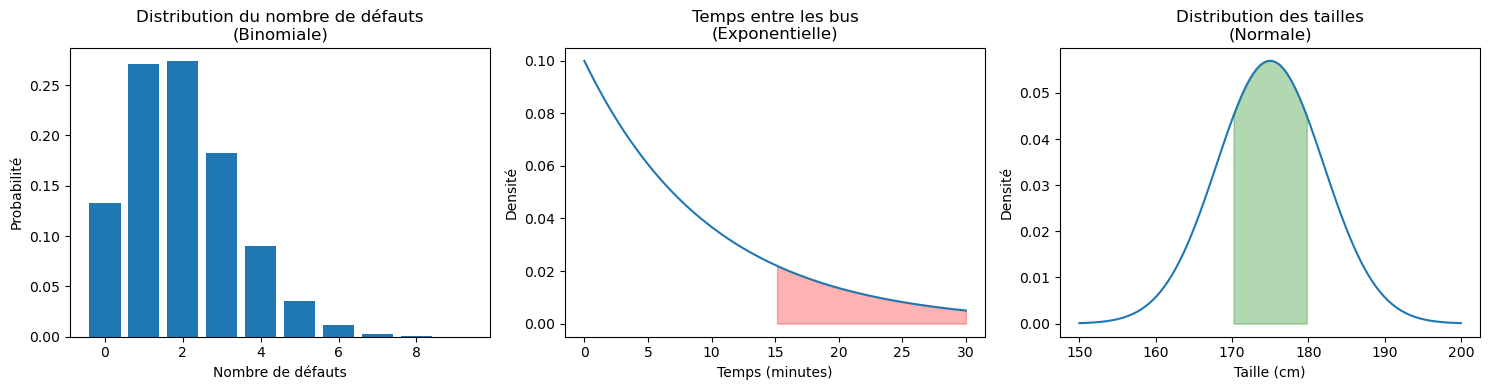

In [11]:
# Applications des lois de probabilité
print("=== Applications Pratiques ===")

# Application 1: Contrôle qualité (Binomiale)
print("\n1. Contrôle qualité - Loi Binomiale:")
n_products = 100
p_defect = 0.02
defect_probs = stats.binom.pmf(np.arange(0, 10), n_products, p_defect)

print(f"Probabilité d'avoir exactement 2 produits défectueux: {defect_probs[2]:.4f}")
print(f"Probabilité d'avoir au plus 3 produits défectueux: {stats.binom.cdf(3, n_products, p_defect):.4f}")

# Application 2: Temps d'attente (Exponentielle)
print("\n2. Temps d'attente - Loi Exponentielle:")
lambda_wait = 1/10  # 10 minutes entre les bus en moyenne
wait_times = stats.expon.rvs(scale=1/lambda_wait, size=1000)

print(f"Probabilité d'attendre plus de 15 minutes: {1 - stats.expon.cdf(15, scale=1/lambda_wait):.4f}")
print(f"Temps d'attente moyen simulé: {np.mean(wait_times):.2f} minutes")

# Application 3: Mesures physiques (Normale)
print("\n3. Mesures physiques - Loi Normale:")
mu_height = 175  # cm
sigma_height = 7  # cm
heights = stats.norm.rvs(mu_height, sigma_height, size=1000)

prob_range = stats.norm.cdf(180, mu_height, sigma_height) - stats.norm.cdf(170, mu_height, sigma_height)
print(f"Probabilité qu'une personne mesure entre 170 et 180 cm: {prob_range:.4f}")
print(f"Pourcentage simulé dans cet intervalle: {np.mean((heights >= 170) & (heights <= 180)):.4f}")

# Visualisation des applications
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# Binomiale
x_binom_app = np.arange(0, 10)
axes[0].bar(x_binom_app, defect_probs[:10])
axes[0].set_title("Distribution du nombre de défauts\n(Binomiale)")
axes[0].set_xlabel('Nombre de défauts')
axes[0].set_ylabel('Probabilité')

# Exponentielle
x_exp_app = np.linspace(0, 30, 100)
axes[1].plot(x_exp_app, stats.expon.pdf(x_exp_app, scale=1/lambda_wait))
axes[1].fill_between(x_exp_app[x_exp_app > 15], 
                   stats.expon.pdf(x_exp_app[x_exp_app > 15], scale=1/lambda_wait), 
                   alpha=0.3, color='red')
axes[1].set_title("Temps entre les bus\n(Exponentielle)")
axes[1].set_xlabel('Temps (minutes)')
axes[1].set_ylabel('Densité')

# Normale
x_norm_app = np.linspace(150, 200, 100)
axes[2].plot(x_norm_app, stats.norm.pdf(x_norm_app, mu_height, sigma_height))
axes[2].fill_between(x_norm_app[(x_norm_app >= 170) & (x_norm_app <= 180)], 
                   stats.norm.pdf(x_norm_app[(x_norm_app >= 170) & (x_norm_app <= 180)], mu_height, sigma_height), 
                   alpha=0.3, color='green')
axes[2].set_title("Distribution des tailles\n(Normale)")
axes[2].set_xlabel('Taille (cm)')
axes[2].set_ylabel('Densité')

plt.tight_layout()
plt.show()

## Conclusion

Ce notebook illustre les concepts fondamentaux des variables aléatoires, fonctions de répartition, densités de probabilité, et présente les lois usuelles avec des simulations et vérifications pratiques.